In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#读取取关用户记录表，查看前5行（这是一个记录了用户取消关注时间的记录表）
df = pd.read_csv("C:\\千里马\\engin_wechat_mp_info.csv", encoding='gbk')
df.head()

,id,business_type,unionid,openid,state,create_time,update_time
0,93,1,onYyK5tCfQ0gDC8_etIN385EOq_w,os0ZR1e_PcPj10zpBuseNSya3Iec,0,2023/1/12 21:33:52,2023/7/21 14:19:34
1,143,1,onYyK5ggqFD7cQqRQ47oxk9LkjRw,os0ZR1QjdyV8sSPGDWXVcSwK2jxs,0,2023/1/12 21:34:01,2023/7/21 21:45:53
2,185,1,onYyK5kbcPBaxpJBGInpRnKctTuI,os0ZR1Qjzd4v3ATshXmSNB6GB_9w,0,2023/1/12 21:34:08,2023/6/21 01:39:45
3,218,1,onYyK5tfTmVTRa-RS0yIqL9C3Oig,os0ZR1capmzgift6Wj27wBV3ZO80,0,2023/1/30 13:46:45,2023/7/22 15:51:07
4,234,1,onYyK5gLwo0ztnupsDF-F-tI8FF0,os0ZR1RUvek8Yg50CzwRQcM7EQUM,0,2023/2/9 20:21:10,2023/6/29 18:09:07


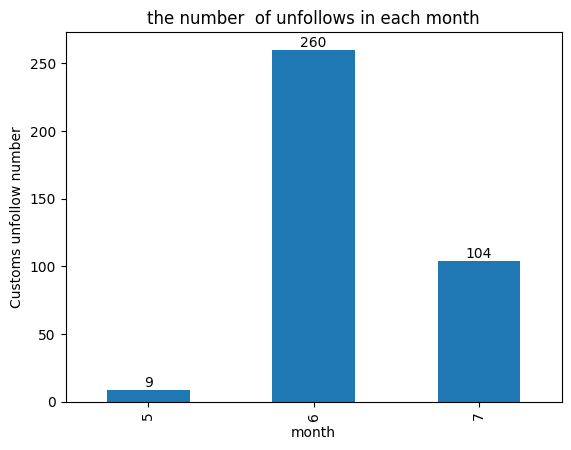

In [19]:
# 根据update_time字段统计每个月的取消关注人数
# 将update_time列名修改为unfollow_time,将create_time列名修改为follow_time
df = df.rename(columns={'update_time': 'unfollow_time'})
df = df.rename(columns={'create_time': 'follow_time'})
df['unfollow_time'] = pd.to_datetime(df['unfollow_time'])
df['follow_time'] = pd.to_datetime(df['follow_time'])
df['month'] = df['unfollow_time'].dt.month
df['month'].value_counts().sort_index().plot(kind='bar')
# 标注数字
for a, b in zip(range(12), df['month'].value_counts().sort_index()):
    plt.text(a, b + 0.05, '%.0f' % b, ha='center', va='bottom', fontsize=10)
plt.xlabel('month')
plt.ylabel('Customs unfollow number')
plt.title('the number  of unfollows in each month')
plt.show()


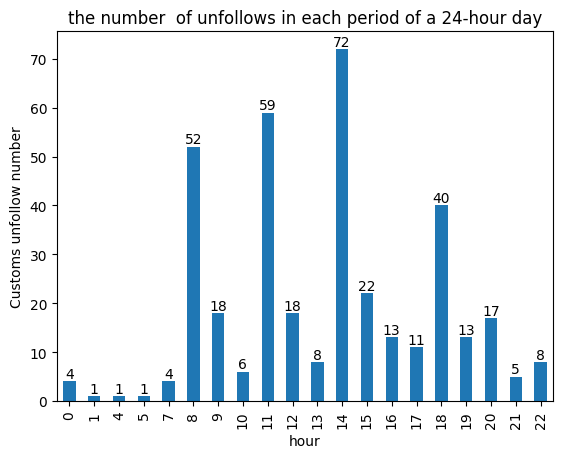

In [20]:
# 根据unfollow_time字段统计一天24小时中各个时间段的取消关注人数
df['hour'] = df['unfollow_time'].dt.hour
df['hour'].value_counts().sort_index().plot(kind='bar')
# 标注数字
for a, b in zip(range(24), df['hour'].value_counts().sort_index()):
    plt.text(a, b + 0.05, '%.0f' % b, ha='center', va='bottom', fontsize=10)
plt.xlabel('hour')
plt.ylabel('Customs unfollow number')
plt.title('the number  of unfollows in each period of a 24-hour day')
plt.show()


### 显然，消息的推送是导致用户取关的直接原因


## 下面讨论流失的用户是否是目标用户

In [21]:
# 读取所有用户的行为记录表
df1 = pd.read_csv("C:\\千里马\\user_behavior_engin_info.csv")
df1.head()


C:\Users\11383\AppData\Local\Temp\ipykernel_2144\2162795760.py:2: DtypeWarning: Columns (6,7,19,20,21,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("C:\\千里马\\user_behavior_engin_info.csv")


,_id,openid,province,city,companyType,isVIP,pageId,pageFrontId,deed,objectId,...,keyword,ctx,projectId,projectName,projectStage,projectType,projectArea,projectMonetary,companyName,cid
0,644efd7cf1fb812bfcdefe02,oriqS5Ap4iqjeXQCRzurz4VxbtLc,NaN,NaN,NaN,0,1,NaN,6,a3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,644efd7cf1fb812bfcdefe05,oriqS5Ap4iqjeXQCRzurz4VxbtLc,NaN,NaN,NaN,0,1,NaN,0,p1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,644efd7df1fb812bfcdefe07,oriqS5Ap4iqjeXQCRzurz4VxbtLc,NaN,NaN,NaN,0,2,NaN,0,p2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,644efd82f1fb812bfcdefe10,oriqS5Ap4iqjeXQCRzurz4VxbtLc,NaN,NaN,NaN,0,2,NaN,2,b3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,644efd83f1fb812bfcdefe11,oriqS5Ap4iqjeXQCRzurz4VxbtLc,NaN,NaN,NaN,0,7,NaN,0,p7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# 读取所有用户的基本信息表
df2 = pd.read_csv("C:\\千里马\\user.csv")
df2.head()


,id,username,password,openid,unionid,nick_name,head_url,sex,birth_date,company,...,phone,update_time,create_time,source,user_type,province_name,province_id,city_name,city_id,register_time
0,1,1.558921e+10,fCKffuEjgug7pp7mBofjCfoj77RB88BB,oriqS5OBi-NRqYI-yrNRpK5kp3Cc,onYyK5nR1EJm_DR5Ue4s0kPBAPLk,"Miss,,,right,,,",http://guanwang-static.oss-cn-qingdao.aliyuncs...,0.0,2022-09-05,千里马,...,1.558921e+10,2023/7/17 15:25:02,2022/9/5 19:33:30,1,1,山东,21.0,枣庄,1749.0,2022/9/5 20:06:20
1,2,1.882508e+10,3Bg8E8mo3Rpu8Ej7UffCRfgR8ouuKmBu,oriqS5NI05HED9wL_3164nIWz-Vw,onYyK5twTs5dKm-SMdT8_2RzLcd4,千里马,http://guanwang-static.oss-cn-qingdao.aliyuncs...,0.0,2018-12-05,企业用户2,...,1.882508e+10,2023/1/16 11:04:53,2022/9/5 19:34:44,1,1,广东,5.0,惠州,307.0,2022/9/5 19:39:03
2,3,1.302779e+10,73jf3jfCRBmg3mEmooRRg8ugRBEE7pBB,oriqS5CShJ7tNq854IG4zL8gSOPw,NaN,测试～李吉祥,https://file-smallv.qianlima.com/0YXYXY/zdj_mp...,0.0,2033-09-05,哈哈,...,1.302779e+10,2022/9/21 15:50:37,2022/9/5 19:38:31,1,1,河南,10.0,郑州,817.0,2022/9/5 19:40:18
3,4,1.862545e+10,UEK7ugBjjgm3o3jgjgKRUBg3UgmKjRBo,oriqS5KNZ1c7FgbkqkLPji8puDHI,onYyK5qAReUE1UJCUrIqpAkiFsEc,微信用户,https://file-smallv.qianlima.com/0YXYXY/zdj_mp...,NaN,NaN,千里马,...,1.862545e+10,2023/7/10 10:28:05,2022/9/5 19:40:01,1,1,广东,5.0,潮州,302.0,2022/9/5 19:40:17
4,5,1.301607e+10,gofjfjou33uUmUKuUg788BUU73388UBj,oriqS5ORCFe_n_HhS-nP0nu-kICw,NaN,微信用户,https://file-smallv.qianlima.com/0YXYXY/zdj_mp...,NaN,NaN,NaN,...,1.301607e+10,2022/9/5 20:42:34,2022/9/5 20:41:07,1,1,北京,2.0,NaN,NaN,2022/9/5 20:41:54


In [23]:
# 取关表与用户基本信息表的unionid可以确认为同一个用户的信息，我们可以为取关表添加用户基本信息create_time,register_time,并用用户基本信息表的openid补充取关表的openid
# 用户的取关日期与注册日期之差作为用户的存活周期
df2 = df2[['unionid', 'openid','create_time', 'register_time']]
df3 = pd.merge(df, df2, how='left', on='unionid')
# 去除df3的openid_x列，将openid_y列重命名为openid；去除month，hour列
df3 = df3.drop(['openid_x', 'month', 'hour'], axis=1)
df3 = df3.rename(columns={'openid_y': 'openid'})
df3['create_time'] = pd.to_datetime(df3['create_time'])
df3['register_time'] = pd.to_datetime(df3['register_time'])
df3['living_days'] = df3['unfollow_time'] - df3['follow_time']
df3['living_days'] = df3['living_days'].dt.days
df3.head()

,id,business_type,unionid,state,follow_time,unfollow_time,openid,create_time,register_time,living_days
0,93,1,onYyK5tCfQ0gDC8_etIN385EOq_w,0,2023-01-12 21:33:52,2023-07-21 14:19:34,oriqS5LIo2QQqH_yff2w0ciGJNX0,2022-12-20 15:42:39,2022-12-20 15:42:58,189
1,143,1,onYyK5ggqFD7cQqRQ47oxk9LkjRw,0,2023-01-12 21:34:01,2023-07-21 21:45:53,NaN,NaT,NaT,190
2,185,1,onYyK5kbcPBaxpJBGInpRnKctTuI,0,2023-01-12 21:34:08,2023-06-21 01:39:45,oriqS5KjbiTeLGiGARjeqod7YOMQ,2022-09-06 10:04:28,2022-09-06 10:06:53,159
3,218,1,onYyK5tfTmVTRa-RS0yIqL9C3Oig,0,2023-01-30 13:46:45,2023-07-22 15:51:07,oriqS5KuKwb4WoKq1Nx9CLB7lb40,2022-10-26 18:05:02,2022-10-26 18:05:16,173
4,234,1,onYyK5gLwo0ztnupsDF-F-tI8FF0,0,2023-02-09 20:21:10,2023-06-29 18:09:07,oriqS5GmSUXw8po0wnmZCIs-UjXM,2023-04-13 22:10:08,2023-04-13 22:10:40,139


In [24]:
# 补充后的取关表的openid与用户行为记录的openid可以匹配，合并两个表，得到取关用户的行为记录表
df4 = pd.merge(df3, df1, how='left', on='openid')
df4.head()


,id,business_type,unionid,state,follow_time,unfollow_time,openid,create_time,register_time,living_days,...,keyword,ctx,projectId,projectName,projectStage,projectType,projectArea,projectMonetary,companyName,cid
0,93,1,onYyK5tCfQ0gDC8_etIN385EOq_w,0,2023-01-12 21:33:52,2023-07-21 14:19:34,oriqS5LIo2QQqH_yff2w0ciGJNX0,2022-12-20 15:42:39,2022-12-20 15:42:58,189,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93,1,onYyK5tCfQ0gDC8_etIN385EOq_w,0,2023-01-12 21:33:52,2023-07-21 14:19:34,oriqS5LIo2QQqH_yff2w0ciGJNX0,2022-12-20 15:42:39,2022-12-20 15:42:58,189,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93,1,onYyK5tCfQ0gDC8_etIN385EOq_w,0,2023-01-12 21:33:52,2023-07-21 14:19:34,oriqS5LIo2QQqH_yff2w0ciGJNX0,2022-12-20 15:42:39,2022-12-20 15:42:58,189,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,93,1,onYyK5tCfQ0gDC8_etIN385EOq_w,0,2023-01-12 21:33:52,2023-07-21 14:19:34,oriqS5LIo2QQqH_yff2w0ciGJNX0,2022-12-20 15:42:39,2022-12-20 15:42:58,189,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,93,1,onYyK5tCfQ0gDC8_etIN385EOq_w,0,2023-01-12 21:33:52,2023-07-21 14:19:34,oriqS5LIo2QQqH_yff2w0ciGJNX0,2022-12-20 15:42:39,2022-12-20 15:42:58,189,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# 保留用户的openid,create_time,register_time,follow_time，unfollow_time,isVIP，pageId，pageFrontId，deed,eventId,oTime,scene,duration,keyword.转成新表格
df5 = df4[['openid', 'create_time', 'register_time', 'follow_time', 'unfollow_time', 'isVIP', 'pageId', 'pageFrontId',
           'deed', 'eventId', 'oTime', 'scene', 'duration', 'keyword']]

df5.head()
df5.to_csv('C:\\千里马\\unfollow_user_behavior.csv', index=False)

In [26]:
# 首先，我们要知道流失用户的行为记录表中，有多少用户是目标用户
df5['openid'].nunique()

351

In [27]:
# 总共有多少条记录
df5.shape[0]

51596

In [28]:
# 平均每个取关用户曾有多少条行为记录
df5.shape[0] / df5['openid'].nunique()


146.997150997151

### 374名取关用户中，351位是有用户行为记录，占比94%

## 一、只以用户行为记录条数来判断用户是否是目标用户

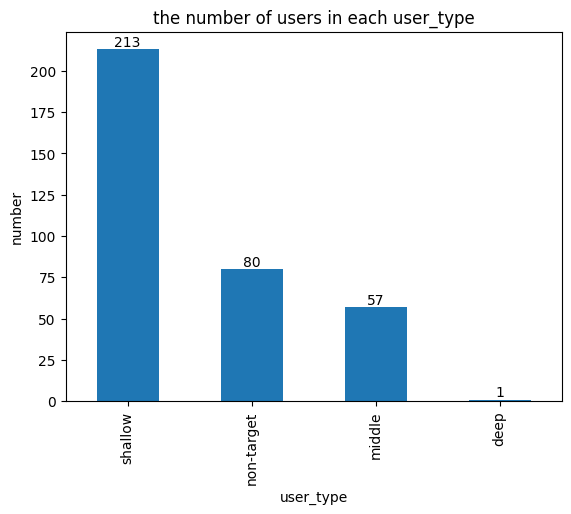

In [29]:
# 假设用户行为记录条数大于1000条的是深度用户，100条到1000条的是中度用户，10~100条的是浅度用户，10条以内的是非目标用户
df6 = df5['openid'].value_counts()
# 修改列名为count
df6 = df6.reset_index().rename(columns={'index': 'openid', 'openid': 'count'})

def user_type(x):
    if x > 1000:
        return 'deep'
    elif x > 100:
        return 'middle'
    elif x > 10:
        return 'shallow'
    else:
        return 'non-target'


df6['user_type'] = df6['count'].apply(user_type)
# 统计各个用户类别各有多少人
df6['user_type'].value_counts()
# 绘制图形
df6['user_type'].value_counts().plot(kind='bar')
# 标注数字
for a, b in zip(range(4), df6['user_type'].value_counts()):
    plt.text(a, b + 0.05, '%.0f' % b, ha='center', va='bottom', fontsize=10)
plt.xlabel('user_type')
plt.ylabel('number')
plt.title('the number of users in each user_type')
plt.show()



In [30]:
df6

,openid,count,user_type
0,oriqS5FHQOGth5qDIuw0s61z9uq4,1237,deep
1,oriqS5LIo2QQqH_yff2w0ciGJNX0,972,middle
2,oriqS5KuKwb4WoKq1Nx9CLB7lb40,727,middle
3,oriqS5FTK60FahH0ZDOaTagng3kQ,718,middle
4,oriqS5AoCEmwxdBZGa6EvcrFw_9A,706,middle
...,...,...,...
346,oriqS5NmuR6PRKZYCH7mw10NrE_o,3,non-target
347,oriqS5IIyRO1O2L2PxDluYYFOL9I,2,non-target
348,oriqS5Ac140GQ8p7XJ6q7f6d8Mfc,2,non-target
349,oriqS5Ff2UiVprSuQ4Ff4w-COcTk,1,non-target


## 二、以用户行为记录的时间点来生成用户有效登录天数，计算用户的登陆日平均记录条数，来判断用户是否是目标用户

In [34]:
# 根据oTime字段中的日期统计用户的登录天数
df5['oTime'] = pd.to_datetime(df5['oTime'])
df7 = df5.groupby('openid')['oTime'].apply(lambda x: x.dt.date.nunique())
df7 = df7.to_frame()
df7 = df7.rename(columns={'oTime': 'login_days'})
df7


C:\Users\11383\AppData\Local\Temp\ipykernel_2144\159473738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['oTime'] = pd.to_datetime(df5['oTime'])


,login_days
openid,
oriqS5A-CWKISA9Hmgj_roFhrnM8,4
oriqS5AB4fNNLcNVd0zAtq3a-tIg,1
oriqS5ABXWIuvt_0npZxQD9YzhGs,20
oriqS5AC2-jBISnFaI9zb3oVQz5k,2
oriqS5AEJICl--vzJ7E84Aufw4Y4,2
...,...
oriqS5PjXq256kP1qPD05o86sV58,1
oriqS5Pn0ou6zJiOq9j3Fm6zklJI,2
oriqS5PpChEZYvINROLQcrE2RnEk,6


In [41]:
# 生成用户登陆日平均记录条数
# 2023/7/24 - 2023/5/29 = 56天
sum_days = 56
df8 = df5.groupby('openid')['oTime'].count()
df8 = df8.to_frame()
df8 = df8.rename(columns={'oTime': 'records'})
df8['login_days'] = df7['login_days']
df8['records each day'] = df8['records'] / df7['login_days']
df8['login_rate'] = df8['login_days'] / sum_days
df8

,records,login_days,records each day,login_rate
openid,,,,
oriqS5A-CWKISA9Hmgj_roFhrnM8,113,4,28.250000,0.071429
oriqS5AB4fNNLcNVd0zAtq3a-tIg,10,1,10.000000,0.017857
oriqS5ABXWIuvt_0npZxQD9YzhGs,308,20,15.400000,0.357143
oriqS5AC2-jBISnFaI9zb3oVQz5k,9,2,4.500000,0.035714
oriqS5AEJICl--vzJ7E84Aufw4Y4,50,2,25.000000,0.035714
...,...,...,...,...
oriqS5PjXq256kP1qPD05o86sV58,86,1,86.000000,0.017857
oriqS5Pn0ou6zJiOq9j3Fm6zklJI,12,2,6.000000,0.035714
oriqS5PpChEZYvINROLQcrE2RnEk,59,6,9.833333,0.107143


In [43]:
# 为取关用户信息表补充存活周期，登陆天数，登陆日平均记录条数
df9 = pd.merge(df3, df7, how='left', on='openid')
df9 = pd.merge(df3, df8, how='left', on='openid')
# 去除openid为nan的行
df9 = df9.dropna(subset=['openid'])
#去除business——type列，state列,unionid列
df9 = df9.drop(['business_type', 'state','unionid'], axis=1)
# 生成新表格
df9.to_csv('C:\\千里马\\unfollow_user_info_statistics.csv', index=False)


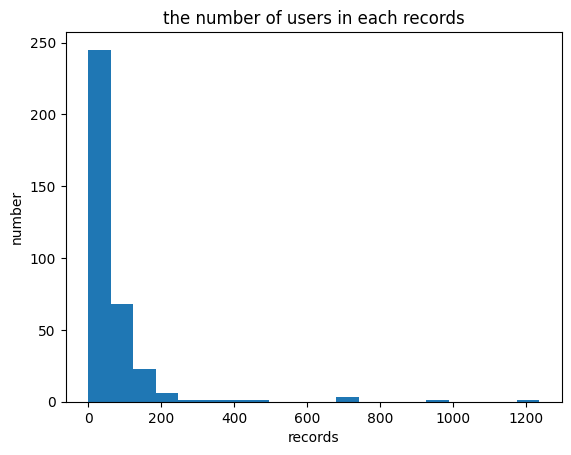

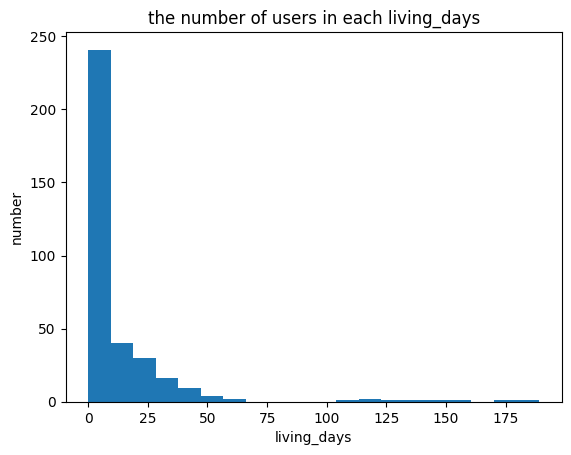

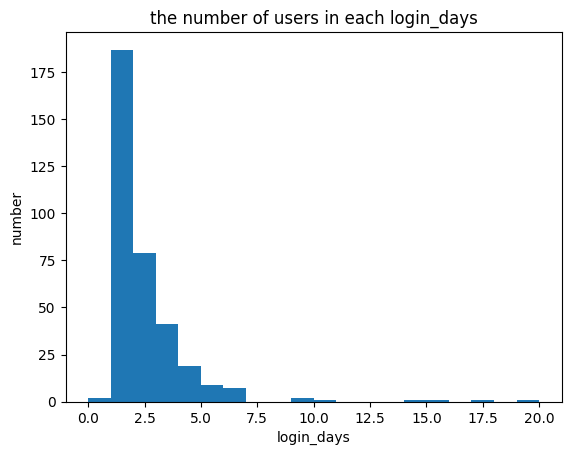

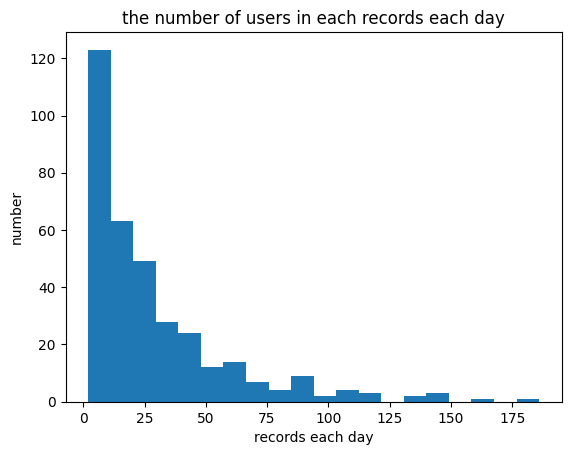

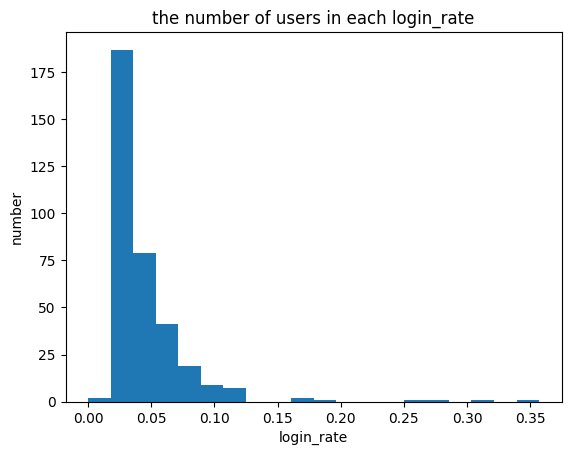

In [50]:
# 对df9中的记录数，存活周期，登陆天数，登陆日平均记录条数，登陆率进行绘图，并将图片保存
#记录数
df9['records'].plot(kind='hist', bins=20)
plt.xlabel('records')
plt.ylabel('number')
plt.title('the number of users in each records')
plt.savefig('C:\\千里马\\records.png')
plt.show()
# 存活周期
df9['living_days'].plot(kind='hist', bins=20)
plt.xlabel('living_days')
plt.ylabel('number')
plt.title('the number of users in each living_days')
plt.savefig('C:\\千里马\\living_days.png')
plt.show()
# 登陆天数
df9['login_days'].plot(kind='hist', bins=20)
plt.xlabel('login_days')
plt.ylabel('number')
plt.title('the number of users in each login_days')
plt.savefig('C:\\千里马\\login_days.png')
plt.show()
# 登陆日平均记录条数
df9['records each day'].plot(kind='hist', bins=20)
plt.xlabel('records each day')
plt.ylabel('number')
plt.title('the number of users in each records each day')
plt.savefig('C:\\千里马\\records each day.png')
plt.show()
# 登陆率
df9['login_rate'].plot(kind='hist', bins=20)
plt.xlabel('login_rate')
plt.ylabel('number')
plt.title('the number of users in each login_rate')
plt.savefig('C:\\千里马\\login_rate.png')
plt.show()




## 三、以用户行为记录的行为类型及是否付费来计算用户活跃度，根据活跃度来判断用户是否是目标用户

In [54]:
# 根据每条记录的情况，计算该条记录所能反应的用户活跃度
# 下面制定一个活跃度计算规则：
# 基础值：5
# isVIP：值为0和1，0表示非VIP用户，1表示VIP用户，权重为10
# deed：
# 0	访问
# 1	浏览
# 2	点击
# 3	曝光
# 4	滑动
# 5	请求数据
# 6	初始化
# 7	曝光特定位置
# 权重为5
# 总分为50，活跃度用百分数表示
# 计算每条记录的活跃度，并作为新列active_rate加入df5中
def active_rate(x):
    if x['isVIP'] == 1:
        return (15 + 5 * x['deed'])/50
    else:
        return (5 + 5 * x['deed'])/50

# 计算每条记录的活跃度
df5['active_rate'] = df5.apply(active_rate, axis=1)
df5


C:\Users\11383\AppData\Local\Temp\ipykernel_2144\4092189991.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['active_rate'] = df5.apply(active_rate, axis=1)


,openid,create_time,register_time,follow_time,unfollow_time,isVIP,pageId,pageFrontId,deed,eventId,oTime,scene,duration,keyword,active_rate
0,oriqS5LIo2QQqH_yff2w0ciGJNX0,2022-12-20 15:42:39,2022-12-20 15:42:58,2023-01-12 21:33:52,2023-07-21 14:19:34,0.0,1,NaN,0.0,01p1,2023-05-04 23:51:05,1089,NaN,NaN,0.1
1,oriqS5LIo2QQqH_yff2w0ciGJNX0,2022-12-20 15:42:39,2022-12-20 15:42:58,2023-01-12 21:33:52,2023-07-21 14:19:34,0.0,1,NaN,6.0,69a3,2023-05-04 23:51:05,1089,NaN,NaN,0.7
2,oriqS5LIo2QQqH_yff2w0ciGJNX0,2022-12-20 15:42:39,2022-12-20 15:42:58,2023-01-12 21:33:52,2023-07-21 14:19:34,0.0,7,NaN,0.0,01p7,2023-05-04 23:51:07,1089,NaN,NaN,0.1
3,oriqS5LIo2QQqH_yff2w0ciGJNX0,2022-12-20 15:42:39,2022-12-20 15:42:58,2023-01-12 21:33:52,2023-07-21 14:19:34,0.0,7,NaN,5.0,59a2,2023-05-04 23:51:07,1089,NaN,NaN,0.6
4,oriqS5LIo2QQqH_yff2w0ciGJNX0,2022-12-20 15:42:39,2022-12-20 15:42:58,2023-01-12 21:33:52,2023-07-21 14:19:34,0.0,7,NaN,1.0,11p7,2023-05-04 23:51:13,1089,5.0,NaN,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51591,oriqS5JjPGO3VhSNASmIqyhlMGM0,2023-07-16 14:36:59,NaT,2023-07-16 14:36:49,2023-07-16 14:41:10,0.0,7,NaN,1.0,11p7,2023-07-16 14:38:24,1035,13.0,NaN,0.2
51592,oriqS5JjPGO3VhSNASmIqyhlMGM0,2023-07-16 14:36:59,NaT,2023-07-16 14:36:49,2023-07-16 14:41:10,0.0,7,NaN,1.0,11p7,2023-07-16 14:38:25,1035,15.0,NaN,0.2
51593,oriqS5JjPGO3VhSNASmIqyhlMGM0,2023-07-16 14:36:59,NaT,2023-07-16 14:36:49,2023-07-16 14:41:10,0.0,1,NaN,0.0,01p1,2023-07-16 14:38:26,1035,NaN,NaN,0.1
51594,oriqS5JjPGO3VhSNASmIqyhlMGM0,2023-07-16 14:36:59,NaT,2023-07-16 14:36:49,2023-07-16 14:41:10,0.0,7,NaN,0.0,01p7,2023-07-16 14:38:26,1035,NaN,NaN,0.1


In [55]:
# 计算每个用户的总活跃度
df10 = df5.groupby('openid')['active_rate'].sum()
df10 = df10.to_frame()
df10 = df10.rename(columns={'active_rate': 'total_active_rate'})
df10

,total_active_rate
openid,
oriqS5A-CWKISA9Hmgj_roFhrnM8,37.9
oriqS5AB4fNNLcNVd0zAtq3a-tIg,1.9
oriqS5ABXWIuvt_0npZxQD9YzhGs,108.7
oriqS5AC2-jBISnFaI9zb3oVQz5k,2.4
oriqS5AEJICl--vzJ7E84Aufw4Y4,16.0
...,...
oriqS5PjXq256kP1qPD05o86sV58,29.6
oriqS5Pn0ou6zJiOq9j3Fm6zklJI,2.7
oriqS5PpChEZYvINROLQcrE2RnEk,11.9


In [59]:
# 为取关用户信息表补充总活跃度
df11 = pd.merge(df9, df10, how='left', on='openid')
# 计算每个用户的登录日平均活跃度
df11['active_rate each day'] = df11['total_active_rate'] / df11['login_days']
df11


,id,follow_time,unfollow_time,openid,create_time,register_time,living_days,records,login_days,records each day,login_rate,total_active_rate,active_rate each day
0,93,2023-01-12 21:33:52,2023-07-21 14:19:34,oriqS5LIo2QQqH_yff2w0ciGJNX0,2022-12-20 15:42:39,2022-12-20 15:42:58,189,972.0,15.0,64.800000,0.267857,284.6,18.973333
1,185,2023-01-12 21:34:08,2023-06-21 01:39:45,oriqS5KjbiTeLGiGARjeqod7YOMQ,2022-09-06 10:04:28,2022-09-06 10:06:53,159,28.0,2.0,14.000000,0.035714,12.7,6.350000
2,218,2023-01-30 13:46:45,2023-07-22 15:51:07,oriqS5KuKwb4WoKq1Nx9CLB7lb40,2022-10-26 18:05:02,2022-10-26 18:05:16,173,727.0,5.0,145.400000,0.089286,372.9,74.580000
3,234,2023-02-09 20:21:10,2023-06-29 18:09:07,oriqS5GmSUXw8po0wnmZCIs-UjXM,2023-04-13 22:10:08,2023-04-13 22:10:40,139,70.0,3.0,23.333333,0.053571,29.9,9.966667
4,249,2023-02-09 20:45:03,2023-06-09 08:14:20,oriqS5CL4zVcQ_nGWR0fvUbaGc30,2023-02-09 20:45:56,2023-03-06 21:44:21,119,40.0,2.0,20.000000,0.035714,15.0,7.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,2388,2023-07-07 21:03:16,2023-07-18 14:12:06,oriqS5LShYZ-Glpgi5wedVqsoywU,2023-07-07 21:03:23,2023-07-07 21:30:55,10,81.0,2.0,40.500000,0.035714,23.3,11.650000
347,2393,2023-07-08 23:51:27,2023-07-10 14:49:50,oriqS5OnalC5_fNA_dH88G5k-EzA,2023-07-08 23:51:38,2023-07-08 23:52:21,1,23.0,1.0,23.000000,0.017857,7.5,7.500000
348,2397,2023-07-10 05:28:29,2023-07-13 08:03:56,oriqS5CrrLBTxbo21sdvXhg4AHWY,2023-07-10 05:30:27,NaT,3,6.0,1.0,6.000000,0.017857,1.5,1.500000
349,2411,2023-07-12 19:11:41,2023-07-23 12:33:39,oriqS5BD6Z2NQUljOAHTYlAmFFK8,2023-07-12 19:11:45,2023-07-12 19:12:17,10,70.0,1.0,70.000000,0.017857,22.1,22.100000


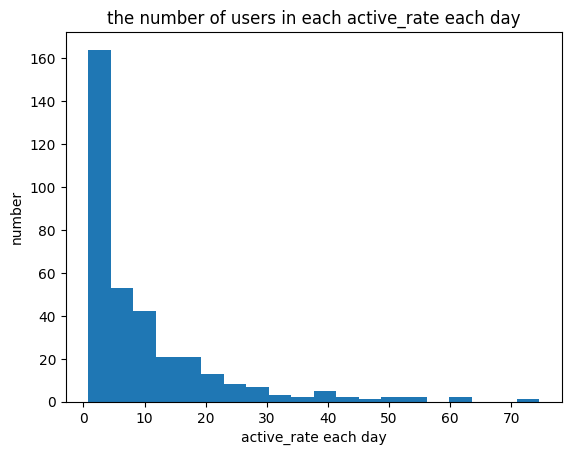

In [60]:
# 绘制日平均活跃度的分布图，并标注数字
df11['active_rate each day'].plot(kind='hist', bins=20)
plt.xlabel('active_rate each day')
plt.ylabel('number')
plt.title('the number of users in each active_rate each day')
plt.savefig('C:\\千里马\\active_rate each day.png')
plt.show()


In [72]:
# 假设登陆日平均活跃度大于50为深度用户，31~50为中度用户，11~30为浅度用户，小于等于10为非活跃用户
# 生成新列active_level，用于标注用户活跃度等级
def active_level(x):
    if x['active_rate each day'] > 50:
        return 'deep'
    elif x['active_rate each day'] > 30:
        return 'middle'
    elif x['active_rate each day'] > 10:
        return 'shallow'
    else:
        return 'inactive'
# 生成新列active_level，用于标注用户活跃度等级
df11['active_level'] = df11.apply(active_level, axis=1)
df11


,id,follow_time,unfollow_time,openid,create_time,register_time,living_days,records,login_days,records each day,login_rate,total_active_rate,active_rate each day,active_level
0,93,2023-01-12 21:33:52,2023-07-21 14:19:34,oriqS5LIo2QQqH_yff2w0ciGJNX0,2022-12-20 15:42:39,2022-12-20 15:42:58,189,972.0,15.0,64.800000,0.267857,284.6,18.973333,shallow
1,185,2023-01-12 21:34:08,2023-06-21 01:39:45,oriqS5KjbiTeLGiGARjeqod7YOMQ,2022-09-06 10:04:28,2022-09-06 10:06:53,159,28.0,2.0,14.000000,0.035714,12.7,6.350000,inactive
2,218,2023-01-30 13:46:45,2023-07-22 15:51:07,oriqS5KuKwb4WoKq1Nx9CLB7lb40,2022-10-26 18:05:02,2022-10-26 18:05:16,173,727.0,5.0,145.400000,0.089286,372.9,74.580000,deep
3,234,2023-02-09 20:21:10,2023-06-29 18:09:07,oriqS5GmSUXw8po0wnmZCIs-UjXM,2023-04-13 22:10:08,2023-04-13 22:10:40,139,70.0,3.0,23.333333,0.053571,29.9,9.966667,inactive
4,249,2023-02-09 20:45:03,2023-06-09 08:14:20,oriqS5CL4zVcQ_nGWR0fvUbaGc30,2023-02-09 20:45:56,2023-03-06 21:44:21,119,40.0,2.0,20.000000,0.035714,15.0,7.500000,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,2388,2023-07-07 21:03:16,2023-07-18 14:12:06,oriqS5LShYZ-Glpgi5wedVqsoywU,2023-07-07 21:03:23,2023-07-07 21:30:55,10,81.0,2.0,40.500000,0.035714,23.3,11.650000,shallow
347,2393,2023-07-08 23:51:27,2023-07-10 14:49:50,oriqS5OnalC5_fNA_dH88G5k-EzA,2023-07-08 23:51:38,2023-07-08 23:52:21,1,23.0,1.0,23.000000,0.017857,7.5,7.500000,inactive
348,2397,2023-07-10 05:28:29,2023-07-13 08:03:56,oriqS5CrrLBTxbo21sdvXhg4AHWY,2023-07-10 05:30:27,NaT,3,6.0,1.0,6.000000,0.017857,1.5,1.500000,inactive
349,2411,2023-07-12 19:11:41,2023-07-23 12:33:39,oriqS5BD6Z2NQUljOAHTYlAmFFK8,2023-07-12 19:11:45,2023-07-12 19:12:17,10,70.0,1.0,70.000000,0.017857,22.1,22.100000,shallow


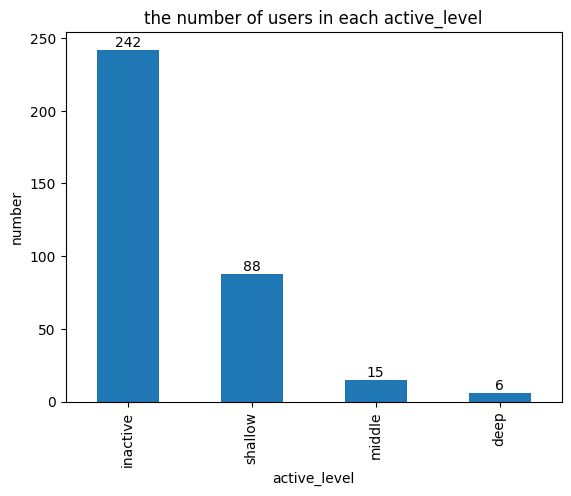

In [73]:
# 绘制活跃度等级的分布图，并为每一个等级标注人数
for i in range(len(df11['active_level'].value_counts())):
    plt.text(i, df11['active_level'].value_counts()[i], df11['active_level'].value_counts()[i], ha='center', va='bottom')
df11['active_level'].value_counts().plot(kind='bar')
plt.xlabel('active_level')
plt.ylabel('number')
plt.title('the number of users in each active_level')
plt.savefig('C:\\千里马\\active_level.png')
plt.show()


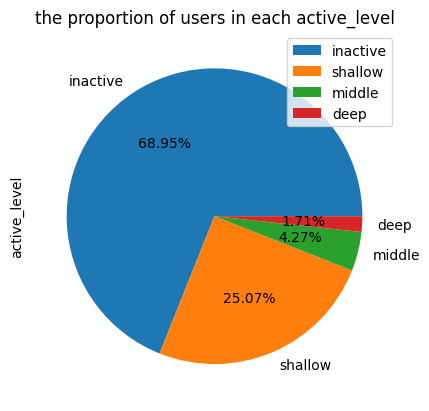

In [74]:
# 绘制饼状图
df11['active_level'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.title('the proportion of users in each active_level')
# 绘制图例
plt.legend(loc='upper right')
plt.savefig('C:\\千里马\\active_level_pie.png')
plt.show()


### 由图可以看出，取关用户中，非活跃用户占比最高，其次是浅度用户，深度用户占比最低